In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [70]:

data=pd.read_csv('BTC-USD.csv',parse_dates=["Date"],sep=',')

#convert dates from string to datetime objects
data["Date"]=pd.to_datetime(data["Date"])

#keep only the date part of datetime object
data["Date"]=data["Date"].dt.date

#drop the nan values
print(data.isna().sum())
data.dropna(axis=0,how='any',inplace=True)
data.isna().sum()


#change volume to integer
#data["Volume"]=data["Volume"].astype('int64')
data.shape

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


(1823, 7)

# Preprocessing

### Testing for multicollinearity
Running the cell we see the close relationship btw Close and Adj Close

Add a dummy variable for time

In [71]:
data['Time_dummy']=np.arange(len(data.index))
data['Time_dummy']=data['Time_dummy'].astype('float64')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Time_dummy
0,2016-12-13,780.646973,788.460022,777.961975,780.556030,780.556030,81645600.0,0.0
1,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000.0,1.0
2,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096.0,2.0
3,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200.0,3.0
4,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800.0,4.0
5,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400.0,5.0
6,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,74886400.0,6.0
7,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,99629296.0,7.0
8,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000.0,8.0
9,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008.0,9.0


In [72]:
prepro=preprocessing.MinMaxScaler()
data_float=data.loc[:, data.dtypes=='float64']
data_scaled=pd.DataFrame(prepro.fit_transform(data_float), index=data_float.index,columns=data_float.columns)
data_scaled

,Open,High,Low,Close,Adj Close,Volume,Time_dummy
0,0.000082,0.000103,0.000338,0.000042,0.000042,0.000060,0.000000
1,0.000072,0.000009,0.000321,0.000056,0.000056,0.000044,0.000549
2,0.000073,0.000000,0.000336,0.000005,0.000005,0.000060,0.001098
3,0.000057,0.000053,0.000354,0.000107,0.000107,0.000066,0.001647
4,0.000150,0.000163,0.000444,0.000196,0.000196,0.000053,0.002195
...,...,...,...,...,...,...,...
1822,0.743920,0.735437,0.710121,0.702126,0.702126,0.084190,0.997805
1823,0.701869,0.723940,0.705021,0.695706,0.695706,0.088073,0.998353
1824,0.696215,0.715749,0.703782,0.727436,0.727436,0.073282,0.998902
1825,0.727518,0.734374,0.730958,0.738453,0.738453,0.062349,0.999451


##### This relationship is also verified by this:

In [73]:
data_duplicate=data_scaled.T.duplicated()
print(data_duplicate)

#drop tha adj close column but keep the same dataframe
data_scaled.drop(["Adj Close"],axis=1,inplace=True)
print(data_scaled.head(10))

Open          False
High          False
Low           False
Close         False
Adj Close      True
Volume        False
Time_dummy    False
dtype: bool
       Open      High       Low     Close    Volume  Time_dummy
0  0.000082  0.000103  0.000338  0.000042  0.000060    0.000000
1  0.000072  0.000009  0.000321  0.000056  0.000044    0.000549
2  0.000073  0.000000  0.000336  0.000005  0.000060    0.001098
3  0.000057  0.000053  0.000354  0.000107  0.000066    0.001647
4  0.000150  0.000163  0.000444  0.000196  0.000053    0.002195
5  0.000237  0.000196  0.000492  0.000191  0.000000    0.002744
6  0.000232  0.000179  0.000527  0.000224  0.000041    0.003293
7  0.000256  0.000293  0.000545  0.000346  0.000111    0.003842
8  0.000381  0.000777  0.000665  0.000846  0.000271    0.004391
9  0.000884  0.001387  0.001195  0.001299  0.000398    0.004940


#### Split the data in training and test

In [74]:
from sklearn.model_selection import train_test_split
x=data_scaled[['Volume', 'Time_dummy']]
y=data_scaled['Close']
# print(x.head)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5849)

from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data-75% of the dataset
LR.fit(x_train,y_train)
print("coefficients are: ", LR.coef_)
print(" Intercept is :", LR.intercept_)

#predicting using the x_test
y_hat=pd.Series(LR.predict(x_test),index=x_test["Volume"].index)

coefficients are:  [1.08605647 0.48462934]
 Intercept is : -0.0936049726127744


In [75]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_hat)
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(y_test,y_hat))
print('root mean squared error is==',np.sqrt(mean_squared_error(y_test,y_hat)))

r2 score is:  0.606945461538819
mean s error is    0.024441248966826944
root mean squared error is== 0.15633697248836229


Text(0.5, 1.0, 'Linear Regression on Volume and Time')

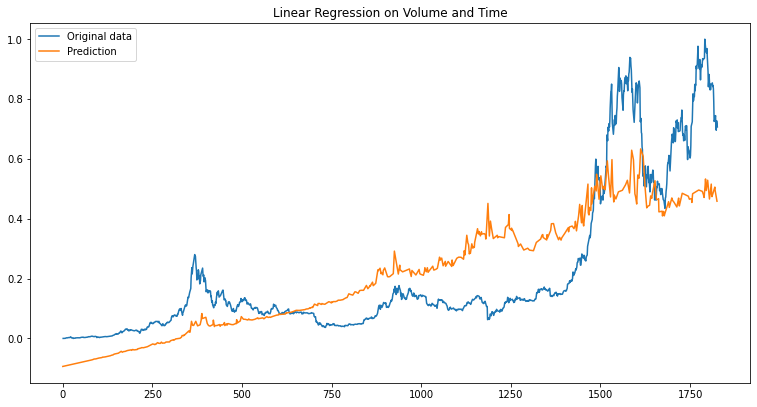

In [76]:


y_train.sort_index(inplace=True)
y_hat.sort_index(inplace=True)
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_axes([0,0,1,1])
ax1.plot(y_train, label="Original data")
ax1.plot(y_hat, label="Prediction")
ax1.legend()
ax1.set_title("Linear Regression on Volume and Time")


In [77]:
from sklearn.model_selection import train_test_split
x=data_scaled[['Open','Volume', 'Time_dummy']]
y=data_scaled['Close']
# print(x.head)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5547)

from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data-75% of the dataset
LR.fit(x_train,y_train)
print("coefficients are: ", LR.coef_)
print(" Intercept is :", LR.intercept_)

#predicting using the x_test
y_hat=pd.Series(LR.predict(x_test),index=x_test["Volume"].index)

coefficients are:  [ 0.9971334  -0.01901378  0.00588025]
 Intercept is : -0.0006963545694713413


In [78]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_hat)
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(y_test,y_hat))
print('root mean squared error is==',np.sqrt(mean_squared_error(y_test,y_hat)))

r2 score is:  0.996966768565476
mean s error is    0.00018939737849713807
root mean squared error is== 0.0137621720123365


Text(0.5, 1.0, 'Linear Regression of Close Price on Volume Time and Open')

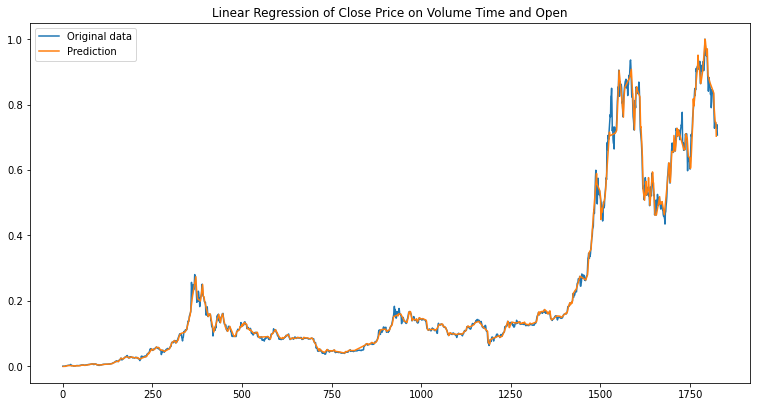

In [79]:

y_train.sort_index(inplace=True)
y_hat.sort_index(inplace=True)
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_axes([0,0,1,1])
ax1.plot(y_train, label="Original data")
ax1.plot(y_hat, label="Prediction")
ax1.legend()
ax1.set_title("Linear Regression of Close Price on Volume Time and Open")